In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

In [12]:
def process_data():
    
    # name the column for the features map
    columns_to_named =["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
    
    # Read the datasert and rename the colunm
    df =pd.read_csv("diabetes.csv",header=0,names=columns_to_named)
    
    col_norm =["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
    
    # Normalization using Custom Lambda Function
    
    df1_norm =df[col_norm].apply(lambda x :( (x - x.min()) / (x.max() -x.min()) ) )
    
    X =df1_norm
    y =df["Outcome"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    return X_train,X_test, y_train,y_test

In [14]:
# Define feature Map

def create_feature_column():
    feat_Pregnancies =tf.feature_column.numeric_column("Pregnancies")
    feat_Glucose =tf.feature_column.numeric_column("Glucose")
    feat_BloodPressure =tf.feature_column.numeric_column("BloodPressure")
    feat_SkinThickness =tf.feature_column.numeric_column("SkinThickness")
    feat_Insulin =tf.feature_column.numeric_column("Insulin")
    feat_BMI =tf.feature_column.numeric_column("BMI")
    feat_DiabetesPedigreeFunction =tf.feature_column.numeric_column("DiabetesPedigreeFunction")

    feature_column =[feat_Pregnancies,feat_Glucose,feat_BloodPressure,
                 feat_SkinThickness,feat_Insulin,feat_BMI,
                 feat_DiabetesPedigreeFunction]
    return feature_column

In [17]:
X_train,X_test, y_train,y_test =process_data()
feature_column =create_feature_column()

input_fun =tf.estimator.inputs.pandas_input_fn(X_train,y_train,
                                              batch_size=50,
                                              num_epochs=1000,
                                              shuffle=True)
eval_fun =tf.estimator.inputs.pandas_input_fn(X_train,y_train,
                                              batch_size=50,
                                              num_epochs=1000,
                                              shuffle=False)
predict_input_fn =tf.estimator.inputs.pandas_input_fn(
                                                    x=X_test,
                                                    num_epochs=1,
                                                    shuffle=False)



In [19]:
# Create a Model

dnnmodel =tf.estimator.DNNClassifier(
                                    hidden_units =[20,20],
                                    feature_columns =feature_column,
                                    n_classes=2,
                                    activation_fn=tf.nn.softmax,
                                    dropout=None,
                                    optimizer =tf.train.AdamOptimizer(learning_rate=0.01)
                                )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MY-PC~1\\AppData\\Local\\Temp\\tmpnlg5plis', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002233DAE1C18>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
# Evaluate:

history =dnnmodel.train(input_fn =input_fun,
                       steps=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\MY-PC~1\AppData\Local\Temp\tmpnlg5plis\model.ckpt.
INFO:tensorflow:loss = 34.854465, step = 1
INFO:tensorflow:global_step/sec: 154.858
INFO:tensorflow:loss = 31.815098, step = 101 (0.652 sec)
INFO:tensorflow:global_step/sec: 361.975
INFO:tensorflow:loss = 28.265411, step = 201 (0.275 sec)
INFO:tensorflow:global_step/sec: 311.389
INFO:ten

In [21]:
dnnmodel.evaluate(eval_fun)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-11T04:38:55Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\MY-PC~1\AppData\Local\Temp\tmpnlg5plis\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-11-04:39:38
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.76908755, accuracy_baseline = 0.6517691, auc = 0.8376318, auc_precision_recall = 0.71604073, average_loss = 0.4726137, global_step = 500, label/mean = 0.3482309, loss = 23.630684, precision = 0.69325155, prediction/mean = 0.34128547, recall = 0.6042781
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\MY-PC~1\AppData\Local\Te

{'accuracy': 0.76908755,
 'accuracy_baseline': 0.6517691,
 'auc': 0.8376318,
 'auc_precision_recall': 0.71604073,
 'average_loss': 0.4726137,
 'label/mean': 0.3482309,
 'loss': 23.630684,
 'precision': 0.69325155,
 'prediction/mean': 0.34128547,
 'recall': 0.6042781,
 'global_step': 500}

In [29]:
predictions =list(dnnmodel.predict(input_fn=predict_input_fn))
prediction =[p["class_ids"][0] for p in predictions]
data =classification_report(y_test,prediction)
conmat= confusion_matrix(y_test,prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MY-PC~1\AppData\Local\Temp\tmpnlg5plis\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


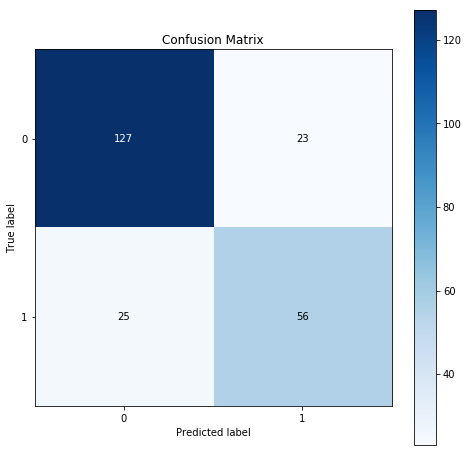

In [31]:
# Analysis

skplt.metrics.plot_confusion_matrix(y_test,
                                   prediction,
                                   figsize=(8,8),
                                   title="Confusion Matrix")

In [32]:
print(data)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       150
           1       0.71      0.69      0.70        81

   micro avg       0.79      0.79      0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231

